Total Sales per Product

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import month, year

In [4]:
#Initialize Spark session
spark = SparkSession.builder.appName("Sales Data Analysis").getOrCreate()

In [5]:
# Load data into Spark DataFrame (if not already done)

sales_df = spark.read.jdbc(
    url="jdbc:postgresql://localhost:5432/salesdb",
    table="sales_summary",
    properties={"user": "hk3", "password": "admin123", "driver": "org.postgresql.Driver"}
)

In [6]:
# Calculate total sales per product

sales_per_product = sales_df.groupBy("Product").sum("Total_Sales").withColumnRenamed("sum(Total_Sales)", "Total_Sales")

In [8]:
# Calculate total sales per month# Calculate total sales per month

sales_per_month = sales_df.withColumn("Month", month("Date")).groupBy("Month").sum("Total_Sales").withColumnRenamed("sum(Total_Sales)", "Total_Sales")

### Show the results

In [9]:
sales_per_product.show(10)

+--------+--------------------+
| Product|         Total_Sales|
+--------+--------------------+
|Widget C|3.0073093329999946E7|
|Widget E|3.0204016930000033E7|
|Widget B|2.9901880950000014E7|
|Widget A|3.0102650809999943E7|
|Widget D|2.9836268410000008E7|
+--------+--------------------+



In [10]:
sales_per_month.show(10)

+-----+--------------------+
|Month|         Total_Sales|
+-----+--------------------+
|   12|1.2297027580000006E7|
|    1|       1.289065724E7|
|    6|1.2376445729999997E7|
|    3|1.2715817510000043E7|
|    5|1.2770325129999975E7|
|    9|1.2277893910000006E7|
|    4|1.2478181470000012E7|
|    8|1.2786480920000002E7|
|    7|1.2778522290000029E7|
|   10|1.2776245289999986E7|
+-----+--------------------+
only showing top 10 rows



### Sort products by total sales

In [11]:
sorted_sales_per_product = sales_per_product.orderBy("Total_Sales", ascending=False)

In [12]:
sorted_sales_per_product.show(10)

+--------+--------------------+
| Product|         Total_Sales|
+--------+--------------------+
|Widget E|3.0204016930000033E7|
|Widget A|3.0102650809999943E7|
|Widget C|3.0073093329999946E7|
|Widget B|2.9901880950000014E7|
|Widget D|2.9836268410000008E7|
+--------+--------------------+



### Saving Results with PySpark (to PostgreSQL):

In [13]:
sales_per_product.write.jdbc(
    url="jdbc:postgresql://localhost:5432/salesdb",
    table="total_sales_per_product",
    mode="overwrite",
    properties={"user": "hk3", "password": "admin123", "driver": "org.postgresql.Driver"}
)

Example of Visualization with Pandas and Matplotlib:

Step-by-Step Guide to Visualize PySpark DataFrames:



### The necessary libraries installed

In [69]:
pip install pyspark pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:

import matplotlib.pyplot as plt

In [63]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Sales Data").getOrCreate()

#need to convert the PySpark DataFrame to a Pandas DataFrame to use matplotlib.
total_sales_per_product = sales_per_product.toPandas()  # Convert PySpark DataFrame to Pandas DataFrame

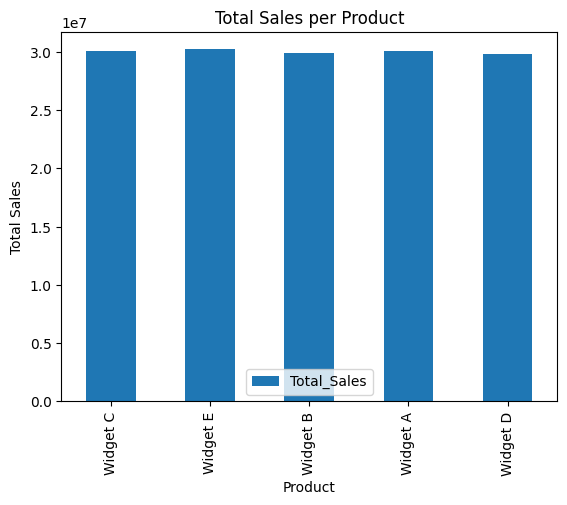

In [65]:
total_sales_per_product.plot(kind='bar', x='Product', y='Total_Sales', title="Total Sales per Product")
plt.ylabel("Total Sales")
plt.show(10)